---
title: A quick demonstration of anomaly detection (and clustering) with DBSCAN
author: Dr Ghita Berrada
bibliography: ../../../../references/DS101.bib
---

## About DBSCAN
 

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a density-based unsupervised learning algorithm. It computes nearest neighbor graphs to find arbitrary-shaped clusters and outliers. DBSCAN can generate clusters of arbitrary shape and also singles out outliers: by constrast, K-means clustering generates spherical-shaped clusters and fits all the data points within the space (including outliers) into a cluster. 

Unlike K-means, DBSCAN does not require `K`, the number of clusters, as an input parameter. Instead, it requires two parameters: `eps` and `minPts`.

- eps: it is the radius of specific neighborhoods. If the distance between two points is less than or equal to `eps`, the two points will be considered to belong to the same neighbourhood
- minPts: minimum number of data points in a given neighborhood to form the clusters. 
  
DBSCAN uses these two parameters to define core points, border points, or outliers.

![](figures/dbscan.jpeg)

*How does the DBSCAN clustering algorithm work?*
 

It starts by randomly selecting any point `p`. 
It is also called a core point if there are more data points than `minPts` in the neighborhood of radius `eps`. 
It will use `eps` and `minPts` to identify all density reachable points (i.e all the points reachable via a set of core points).
It will create a cluster using `eps` and `minPts` if `p` is a core point. 
It will move to the next data point if `p` is a border point. A data point is called a border point if it has fewer points than `minPts` in the neighborhood. 
The algorithm will continue until all points are visited.
A point which is neither a core or border point is an outlier...

If this explanation confuses you, you can have a look at [this Youtube video](https://www.youtube.com/watch?app=desktop&v=RDZUdRSDOok).

Or you can have a look at [this page](https://www.reneshbedre.com/blog/dbscan-python.html) if you want even more details and a look at another demo! Here's another [page](https://towardsdatascience.com/dbscan-clustering-explained-97556a2ad556) for the technical details of DBSCAN. You can also check the original DBSCAN paper at [@dbscan_1996].

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

In [10]:
data = pd.read_csv("Mall_Customers.csv")

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


We select three columns within our dataset for our clustering/anomaly detection: age, annual income and spending score.

In [12]:
X = data[['Age', 'Annual_Income_(k$)', 'Spending_Score']]

We fit `X` on the DBSCAN algorithm with `eps` 12.5 and `min_sample` 4. After that, we create a `DBSCAN_dataset` from `X` and create a ‘Cluster’ column using `clustering.labels_` (i.e the labels created by DBSCAN). 

In [13]:
clustering = DBSCAN(eps=12.5, min_samples=4).fit(X)
DBSCAN_dataset = X.copy()
DBSCAN_dataset.loc[:,'Cluster'] = clustering.labels_ 

To visualize the distribution of clusters, we use value_counts() and convert it into a dataframe. 

As you can see, we have 5 clusters and 1 outlier "class" (outliers are given the -1 label by DBSCAN). The `0` cluster has the largest size with 112 rows. 

In [14]:
DBSCAN_dataset.Cluster.value_counts().to_frame()

Cluster
 0      112
 2       34
 3       24
-1       18
 1        8
 4        4

There are two plots: “Annual Income vs. Spending Score” and “Annual Income vs. Age.” The clusters are defined by colors, and the outliers are defined as small black dots. 

The visualization clearly shows how each customer is part of one of the 5 clusters: we can use this information to target high-end offers towards customers in the purple cluster and cheaper offers to customers in the dark green cluster. 

How do you think this clustering compares to k-means earlier?

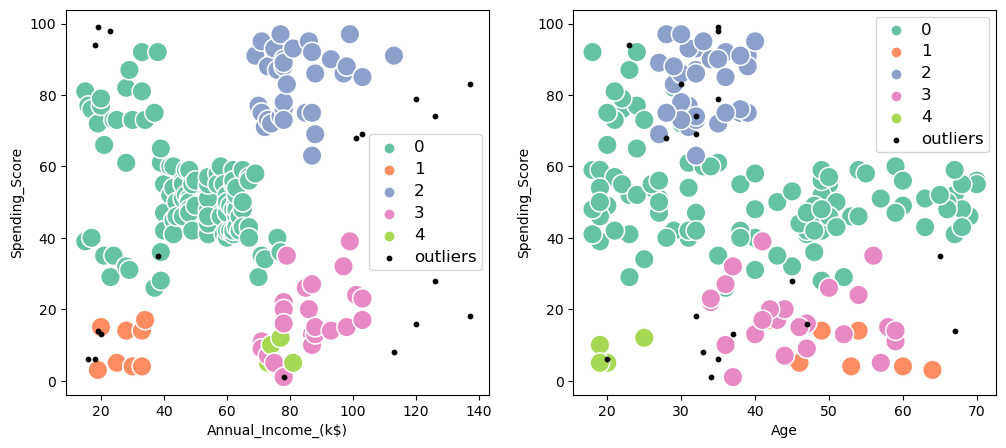

In [19]:
outliers = DBSCAN_dataset[DBSCAN_dataset['Cluster']==-1]

fig2, (axes) = plt.subplots(1,2,figsize=(12,5))

sns.scatterplot(x='Annual_Income_(k$)', y='Spending_Score',

                data=DBSCAN_dataset[DBSCAN_dataset['Cluster']!=-1],

                hue='Cluster', ax=axes[0], palette='Set2', legend='full', s=200)

sns.scatterplot(x='Age', y='Spending_Score',

                data=DBSCAN_dataset[DBSCAN_dataset['Cluster']!=-1],

                hue='Cluster', palette='Set2', ax=axes[1], legend='full', s=200)

axes[0].scatter(outliers['Annual_Income_(k$)'], outliers['Spending_Score'], s=10, label='outliers', c="k")

axes[1].scatter(outliers['Age'], outliers['Spending_Score'], s=10, label='outliers', c="k")
axes[0].legend()
axes[1].legend()

plt.setp(axes[0].get_legend().get_texts(), fontsize='12')
plt.setp(axes[1].get_legend().get_texts(), fontsize='12')

plt.show()